## Project 9: Company sales prediction.

Objective: Prediction about the segment or attributes causes high sale in the company.


In [53]:
## importing Libraries/packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [214]:
data=pd.read_csv('D:/Data Science/TOPMENTOR-DS/Machine Learning/Random Forests-Project-9&10/Company_Data.csv')
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [215]:
# make a copy of data'
df=data.copy()

In [216]:
df.shape

(400, 11)

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [218]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

There are no null values in the dataset

In [219]:
df.duplicated().sum()

0

There are no duplicate rows in the data

### Exploratory data analysis

In [220]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [221]:
# to check the categorical columns
cat_col=df.select_dtypes(np.object_)

In [222]:
cat_col.head()

,ShelveLoc,Urban,US
0,Bad,Yes,Yes
1,Good,Yes,Yes
2,Medium,Yes,Yes
3,Medium,Yes,Yes
4,Bad,Yes,No


In [223]:
# to check the numerical columns
num_col=df.select_dtypes(np.number)
num_col.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
0,9.50,138,73,11,276,120,42,17
1,11.22,111,48,16,260,83,65,10
2,10.06,113,35,10,269,80,59,12
3,7.40,117,100,4,466,97,55,14
4,4.15,141,64,3,340,128,38,13


In [247]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [270]:
df['Sales'].sum()

2942.97

In [248]:
df.groupby(['Urban']).sum()['Sales']

Urban
No      878.23
Yes    2064.74
Name: Sales, dtype: float64

Urban locations has more Sales compared to the rural locations. 

In [249]:
df.groupby(['US']).sum()['Sales']

US
No      956.155
Yes    1986.815
Name: Sales, dtype: float64

The stores in US has more sales

In [271]:
df.groupby(['US','Urban']).sum()['Sales']

US   Urban
No   No        293.465
     Yes       662.690
Yes  No        584.765
     Yes      1402.050
Name: Sales, dtype: float64

The stores in US urban areas has more sales

In [259]:
df.groupby(['ShelveLoc']).sum()['Sales']

ShelveLoc
Bad        529.815
Good       822.005
Medium    1591.150
Name: Sales, dtype: float64

1. Medium quality shelving location has more sales followed by good and bad quality.
2. least sales are observed in case of bad shelving location

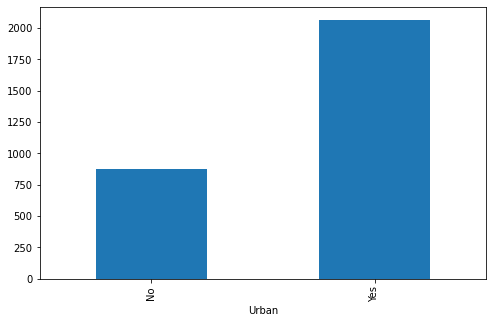

In [265]:
# Urban loc wise sales
plt.figure(figsize = (8,5))
df.groupby(['Urban']).sum()['Sales'].plot(kind='bar')
plt.savefig('Urban loc wise sales',bbox_inches='tight',dpi=200)
plt.show()

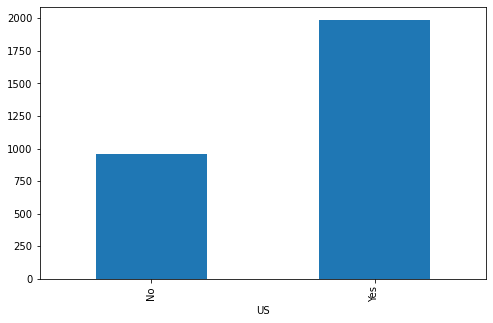

In [266]:
# US loc wise sales
plt.figure(figsize = (8,5))
df.groupby(['US']).sum()['Sales'].plot(kind='bar')
plt.savefig('US loc wise sales',bbox_inches='tight',dpi=200)
plt.show()

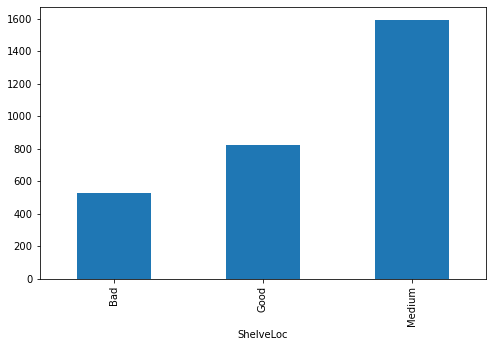

In [267]:
# Shelves loc wise sales
plt.figure(figsize = (8,5))
df.groupby(['ShelveLoc']).sum()['Sales'].plot(kind='bar')
plt.savefig('Shelves loc wise sales',bbox_inches='tight',dpi=200)
plt.show()

Text(0.5, 1.0, 'US_loc-Shelve_loc wise sales')

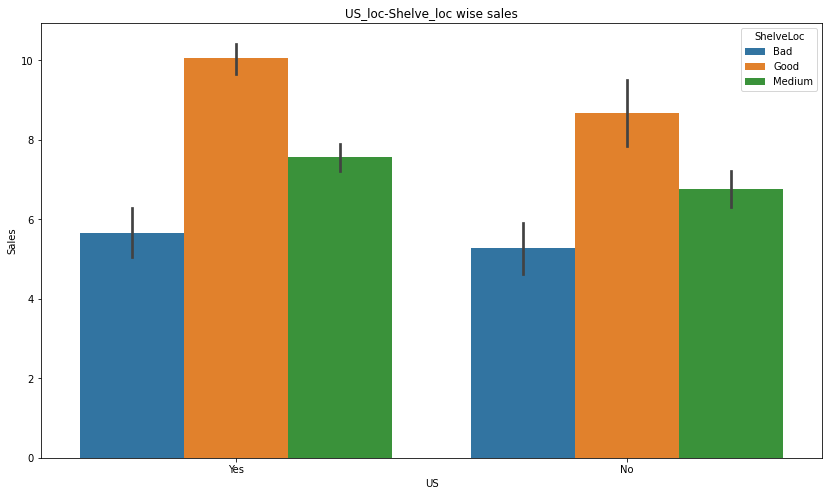

In [268]:
# US_loc-Shelve_loc wise sales 
plt.figure(figsize=(14,8))
sns.barplot(data=df,x='US',y='Sales',hue='ShelveLoc')
plt.savefig('US_loc-Shelve_loc wise sales.jpg',bbox_inches='tight',dpi=200)
plt.title('US_loc-Shelve_loc wise sales')

<AxesSubplot:xlabel='ShelveLoc', ylabel='Sales'>

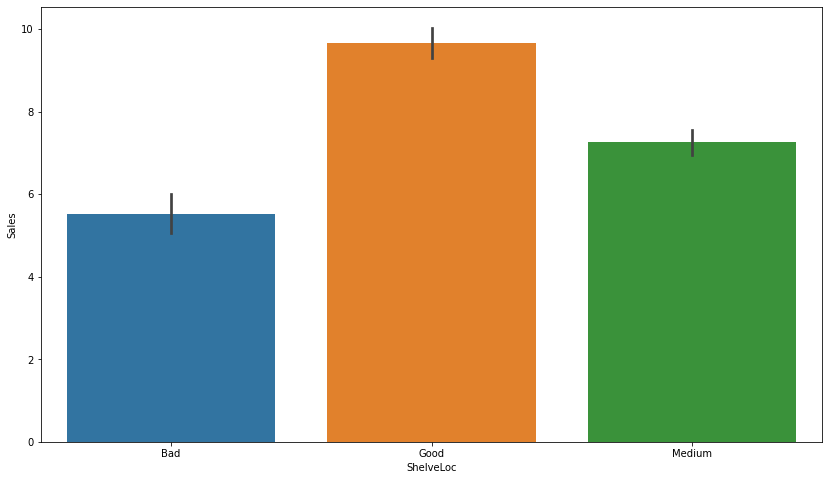

In [255]:
# marital status wise Tax criteria 
plt.figure(figsize=(14,8))
sns.barplot(data=df,x='ShelveLoc',y='Sales')
#plt.savefig('Tax criteria count.jpg',bbox_inches='tight',dpi=200)
#plt.title('count of Tax criteria')

C:\Users\Shipra Choudhary\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Shipra Choudhary\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Shipra Choudhary\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

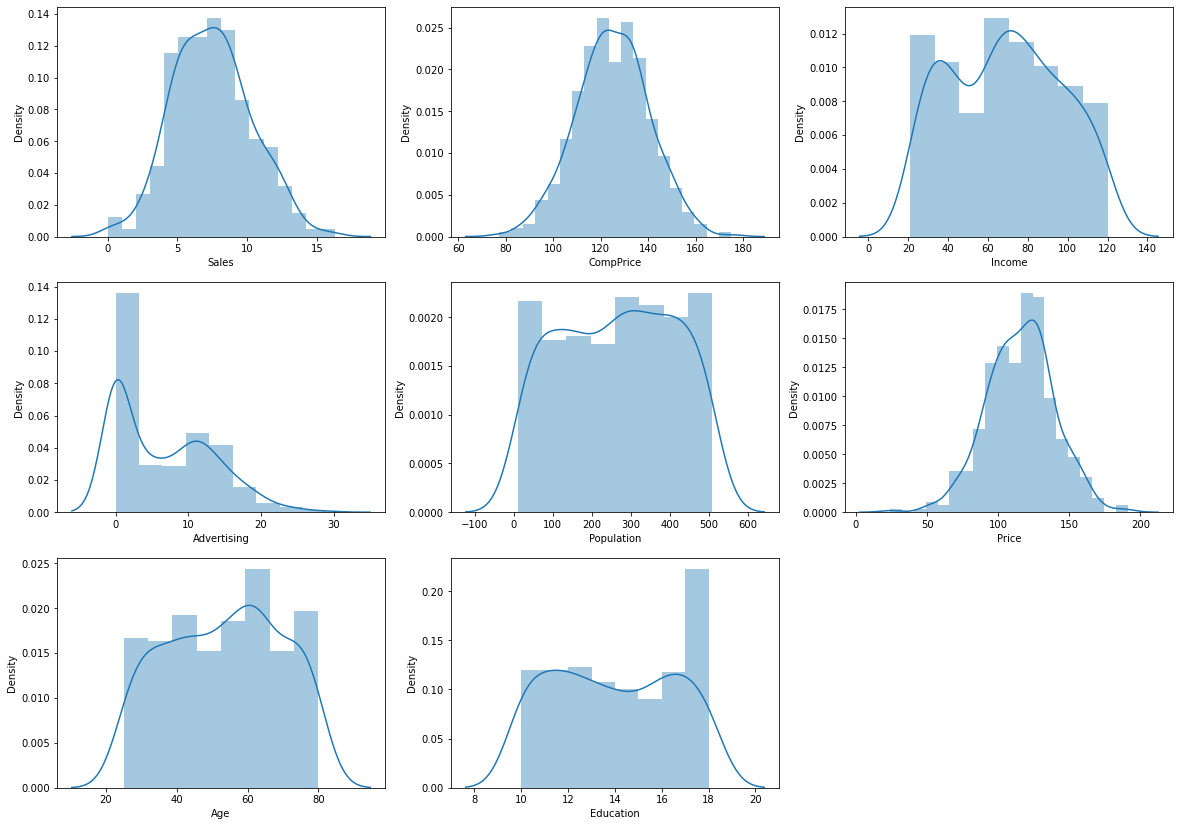

In [228]:
# A univariate distrubution of numerical features
plt.figure(figsize=(20,60),facecolor='white')
plot_num=1
for col in num_col:
    ax=plt.subplot(12,3,plot_num)
    sns.distplot(df[col])
    plt.xlabel(col)
    plot_num+=1
#plt.title('distribution of',df_num)
plt.savefig('distribution of features.jpg')
plt.show()

In [ ]:
The data in all the features is normally distributed.

In [201]:
round(df.skew(),2)
#df.skew()

C:\Users\Shipra Choudhary\AppData\Local\Temp\ipykernel_29108\2066448341.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  round(df.skew(),2)


Sales         -0.21
CompPrice     -0.40
Income         0.05
Advertising    0.64
Population    -0.05
Price         -0.44
Age           -0.08
Education      0.04
dtype: float64

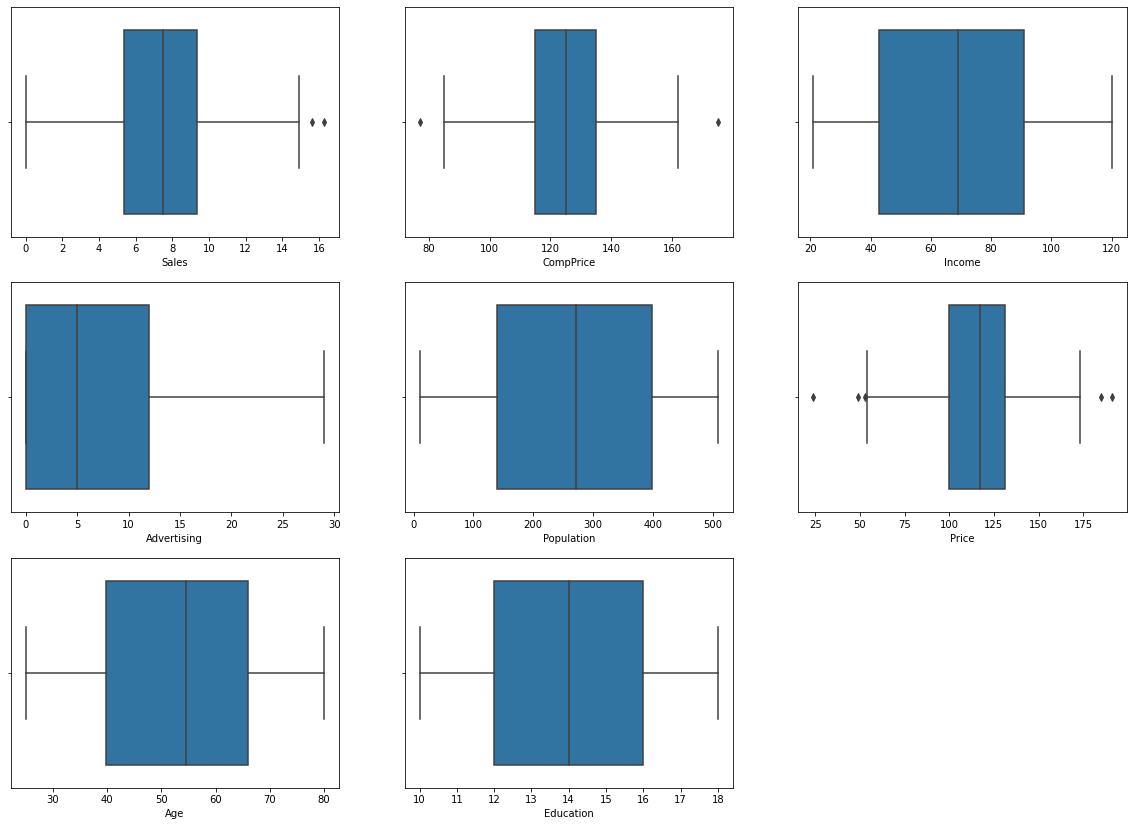

In [229]:
# A univariate boxplot of numerical features
plt.figure(figsize=(20,60),facecolor='white')
plot_num=1
for col in num_col:
    ax=plt.subplot(12,3,plot_num)
    sns.boxplot(x=df[col])
    plt.xlabel(col)
    plot_num+=1
#plt.title('distribution of',df_num)

plt.savefig('boxplot of features with outliers.jpg')
plt.show()

There are some outliers in sales, compprice and price features.

In [230]:
## Adjust/Remove the Outlier present in sales coloumn
Q1 = df['Sales'].quantile(0.25)
print('The value of Q1 is: ', Q1)
Q3 = df['Sales'].quantile(0.75)
print('The value of Q3 is: ', Q3)

The value of Q1 is:  5.390000000000001
The value of Q3 is:  9.32


In [231]:
IQR=Q3-Q1
print('The value of IQR is: ', IQR)
upper_thres = Q1 + (1.5*IQR)
print('The value of upper threshld is :',round(upper_thres,2))

The value of IQR is:  3.9299999999999997
The value of upper threshld is : 11.28


In [232]:
df[df['Sales']>upper_thres]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
11,11.96,117,94,4,503,94,Good,50,13,Yes,Yes
17,12.29,147,74,13,251,131,Good,52,10,Yes,Yes
18,13.91,110,110,0,408,68,Good,46,17,No,Yes
21,12.13,134,29,12,239,109,Good,62,18,No,Yes
25,14.90,139,32,0,176,82,Good,54,11,No,No
30,13.55,125,94,0,447,89,Good,30,12,Yes,No
46,12.44,127,90,14,16,70,Medium,48,15,No,Yes
56,11.91,133,82,0,54,84,Medium,50,17,Yes,No
68,13.39,149,69,20,366,134,Good,60,13,Yes,Yes


In [233]:
## Will Change the row in order to avoid outlier
df['Sales'] = np.where(df['Sales']>upper_thres,upper_thres,df['Sales']) 

In [234]:
## Adjust/Remove the Outlier present in compPrice coloumn
Q1 = df['CompPrice'].quantile(0.25)
print('The value of Q1 is: ', Q1)
Q3 = df['CompPrice'].quantile(0.75)
print('The value of Q3 is: ', Q3)

The value of Q1 is:  115.0
The value of Q3 is:  135.0


In [235]:
IQR=Q3-Q1
print('The value of IQR is: ', IQR)
lower_thres = Q1 - (1.5*IQR)
upper_thres = Q1 + (1.5*IQR)
print('The value of lower threshld is :',round(lower_thres,2))
print('The value of upper threshld is :',round(upper_thres,2))


The value of IQR is:  20.0
The value of lower threshld is : 85.0
The value of upper threshld is : 145.0


In [236]:
df[df['CompPrice']<lower_thres]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
42,10.43,77,69,0,25,24,Medium,50,18,Yes,No


In [237]:
df[df['CompPrice']>upper_thres]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
15,8.710,149,95,5,400,144,Medium,76,18,No,No
17,11.285,147,74,13,251,131,Good,52,10,Yes,Yes
41,7.960,157,53,0,403,124,Bad,58,16,Yes,No
49,10.610,157,93,0,51,149,Good,32,17,Yes,No
52,7.910,153,40,3,112,129,Bad,39,18,Yes,Yes
68,11.285,149,69,20,366,134,Good,60,13,Yes,Yes
71,6.500,148,51,16,148,150,Medium,58,17,No,Yes
74,6.200,150,68,5,125,136,Medium,64,13,No,Yes
82,11.285,151,83,4,325,139,Good,28,17,Yes,Yes
86,8.700,150,84,9,432,134,Medium,64,15,Yes,No


In [238]:
## Will Change the row in order to avoid outlier
df['CompPrice'] = np.where(df['CompPrice']>upper_thres,upper_thres,df['CompPrice']) 

In [239]:
## Will Change the row in order to avoid outlier
df['CompPrice'] = np.where(df['CompPrice']<lower_thres,lower_thres,df['CompPrice']) 

In [240]:
## Adjust/Remove the Outlier present in Price coloumn
Q1 = df['Price'].quantile(0.25)
print('The value of Q1 is: ', Q1)
Q3 = df['Price'].quantile(0.75)
print('The value of Q3 is: ', Q3)

The value of Q1 is:  100.0
The value of Q3 is:  131.0


In [241]:
IQR=Q3-Q1
print('The value of IQR is: ', IQR)
lower_thres = Q1 - (1.5*IQR)
upper_thres = Q1 + (1.5*IQR)
print('The value of lower threshld is :',round(lower_thres,2))
print('The value of upper threshld is :',round(upper_thres,2))

The value of IQR is:  31.0
The value of lower threshld is : 53.5
The value of upper threshld is : 146.5


In [242]:
df[df['Price']<lower_thres]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
42,10.430,85.0,69,0,25,24,Medium,50,18,Yes,No
125,9.340,89.0,78,0,181,49,Medium,43,15,No,No
367,11.285,95.0,106,0,256,53,Good,52,17,Yes,No


In [243]:
df[df['Price']<upper_thres]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.500,138.0,73,11,276,120,Bad,42,17,Yes,Yes
1,11.220,111.0,48,16,260,83,Good,65,10,Yes,Yes
2,10.060,113.0,35,10,269,80,Medium,59,12,Yes,Yes
3,7.400,117.0,100,4,466,97,Medium,55,14,Yes,Yes
4,4.150,141.0,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
394,5.350,130.0,58,19,366,139,Bad,33,16,Yes,Yes
395,11.285,138.0,108,17,203,128,Good,33,14,Yes,Yes
396,6.140,139.0,23,3,37,120,Medium,55,11,No,Yes
398,5.940,100.0,79,7,284,95,Bad,50,12,Yes,Yes


In [244]:
## Will Change the row in order to avoid outlier
df['Price'] = np.where(df['Price']>upper_thres,upper_thres,df['Price']) 

In [245]:
## Will Change the row in order to avoid outlier
df['Price'] = np.where(df['Price']<lower_thres,lower_thres,df['Price']) 

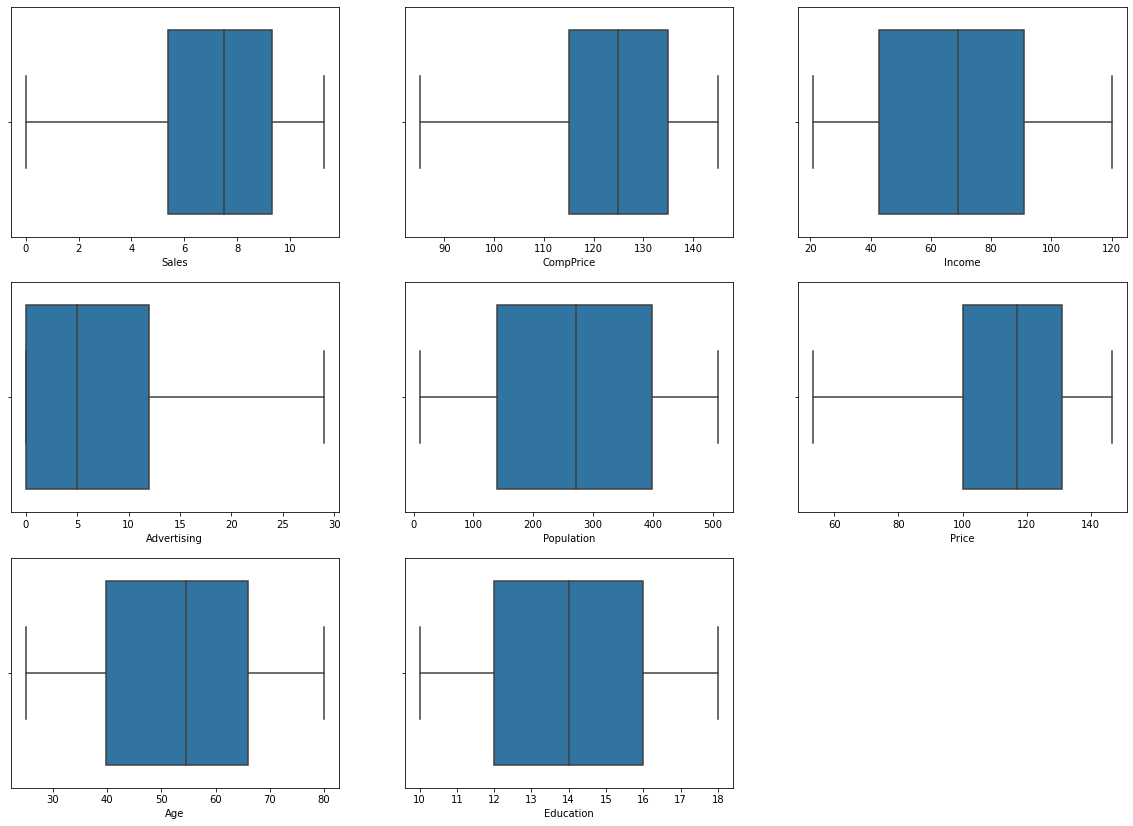

In [246]:
# A univariate boxplot of numerical features after removing outliers
plt.figure(figsize=(20,60),facecolor='white')
plot_num=1
for col in num_col:
    ax=plt.subplot(12,3,plot_num)
    sns.boxplot(x=df[col])
    plt.xlabel(col)
    plot_num+=1
#plt.title('distribution of',df_num)
plt.savefig('boxplot of features.jpg')
plt.show()

In [195]:
# correlation between the features
df.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.056779,0.159144,0.279326,0.051879,-0.426864,-0.230244,-0.036906
CompPrice,0.056779,1.000000,-0.081865,-0.028676,-0.104822,0.565851,-0.096734,0.005215
Income,0.159144,-0.081865,1.000000,0.058995,-0.007877,-0.048703,-0.004670,-0.056855
Advertising,0.279326,-0.028676,0.058995,1.000000,0.265652,0.043151,-0.004557,-0.033594
Population,0.051879,-0.104822,-0.007877,0.265652,1.000000,-0.010450,-0.042663,-0.106378
Price,-0.426864,0.565851,-0.048703,0.043151,-0.010450,1.000000,-0.104171,0.001820
Age,-0.230244,-0.096734,-0.004670,-0.004557,-0.042663,-0.104171,1.000000,0.006488
Education,-0.036906,0.005215,-0.056855,-0.033594,-0.106378,0.001820,0.006488,1.000000


In [94]:
cat_col

,ShelveLoc,Urban,US
0,Bad,Yes,Yes
1,Good,Yes,Yes
2,Medium,Yes,Yes
3,Medium,Yes,Yes
4,Bad,Yes,No
...,...,...,...
395,Good,Yes,Yes
396,Medium,No,Yes
397,Medium,Yes,Yes
398,Bad,Yes,Yes


In [110]:
# let's convert bool value features like urban and US into numeric one
cat_col['Urban'] = cat_col['Urban'].replace(to_replace={'Yes':1, 'No':0})
cat_col['US'] = cat_col['US'].replace(to_replace={'Yes':1, 'No':0})


In [112]:
# OHE FOR ShelveLOc feature
dum=pd.get_dummies(cat_col['ShelveLoc'])

In [113]:
df1=pd.concat([dum,cat_col],axis=1)

In [114]:
df1.head()

,Bad,Good,Medium,ShelveLoc,Urban,US
0,1,0,0,Bad,1,1
1,0,1,0,Good,1,1
2,0,0,1,Medium,1,1
3,0,0,1,Medium,1,1
4,1,0,0,Bad,1,0


In [115]:
df1.drop('ShelveLoc',axis=1,inplace=True)

In [116]:
df1.head()

,Bad,Good,Medium,Urban,US
0,1,0,0,1,1
1,0,1,0,1,1
2,0,0,1,1,1
3,0,0,1,1,1
4,1,0,0,1,0


In [117]:
df2=pd.concat([num_col,df1],axis=1)

In [118]:
df2.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Bad,Good,Medium,Urban,US
0,9.50,138,73,11,276,120,42,17,1,0,0,1,1
1,11.22,111,48,16,260,83,65,10,0,1,0,1,1
2,10.06,113,35,10,269,80,59,12,0,0,1,1,1
3,7.40,117,100,4,466,97,55,14,0,0,1,1,1
4,4.15,141,64,3,340,128,38,13,1,0,0,1,0


In [119]:
# Converting the target variable sales to categorical values
df2.Sales.mean()

7.496325

In [120]:
df2['Sales']=df2.Sales.map(lambda x: 1 if x>7.5 else 0)

In [121]:
df2.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Bad,Good,Medium,Urban,US
0,1,138,73,11,276,120,42,17,1,0,0,1,1
1,1,111,48,16,260,83,65,10,0,1,0,1,1
2,1,113,35,10,269,80,59,12,0,0,1,1,1
3,0,117,100,4,466,97,55,14,0,0,1,1,1
4,0,141,64,3,340,128,38,13,1,0,0,1,0


### Sampling the data

In [168]:
x=df2.iloc[:,1:]
y=df2.iloc[:,:1]


In [169]:
# Standardization of data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [170]:
x_sc=sc.fit_transform(x)

In [171]:
from sklearn.model_selection import train_test_split

In [172]:
x_train,x_test,y_train,y_test=train_test_split(x_sc,y,test_size=0.2, random_state=1)

In [173]:
x_train.shape,x_test.shape

((320, 12), (80, 12))

### Model Building

In [174]:
from sklearn.ensemble import RandomForestClassifier

In [186]:
model_rf=RandomForestClassifier(criterion='entropy', max_depth=5,random_state=1)

In [187]:
model_rf_fit=model_rf.fit(x_train,y_train)

C:\Users\Shipra Choudhary\AppData\Local\Temp\ipykernel_29108\3931986453.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_fit=model_rf.fit(x_train,y_train)


In [188]:
pred=model_rf_fit.predict(x_test)

In [189]:
pred

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0], dtype=int64)

In [190]:
dd=pd.DataFrame(pred,columns=['predicted'])
dd['actual']=y_test.values

In [191]:
dd.head()

,predicted,actual
0,0,0
1,1,1
2,0,0
3,1,1
4,1,1


### Model Dynamics

In [192]:
from sklearn.metrics import r2_score, accuracy_score,confusion_matrix,ConfusionMatrixDisplay,precision_score,classification_report

In [193]:
print('Model: Random Forest')

print('The accuracy of the model is:',round(accuracy_score(dd['actual'],dd['predicted']),2))
print('The precision of the model is:',round(precision_score(dd['actual'],dd['predicted']),2))
print('The confusion matrix is :',confusion_matrix(dd['actual'],dd['predicted']))
print('The classification report is :\n',classification_report(dd['actual'],dd['predicted']))

Model: Random Forest
The accuracy of the model is: 0.79
The precision of the model is: 0.83
The confusion matrix is : [[34  6]
 [11 29]]
The classification report is :
               precision    recall  f1-score   support

           0       0.76      0.85      0.80        40
           1       0.83      0.72      0.77        40

    accuracy                           0.79        80
   macro avg       0.79      0.79      0.79        80
weighted avg       0.79      0.79      0.79        80



<AxesSubplot:>

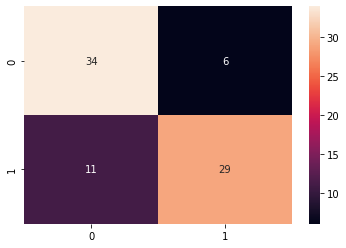

In [194]:
sns.heatmap(confusion_matrix(y_test,pred), annot=True)

### Saving the model

In [225]:
import joblib

In [226]:
filename='company_data_prj_9.sav'

In [227]:
joblib.dump(model_rf_fit,filename)

['company_data_prj_9.sav']